In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection

In [3]:
df=pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# label encoding
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [11]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [13]:
# dependent values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
# replacing the value of 3+ to 4
df =df.replace(to_replace='3+', value=4)

In [15]:
# dependent values
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

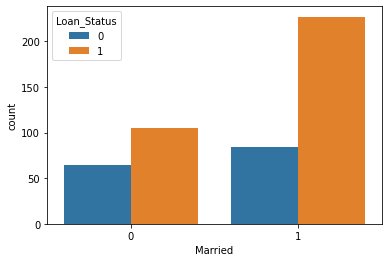

In [16]:

# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)


<AxesSubplot:xlabel='Education', ylabel='count'>

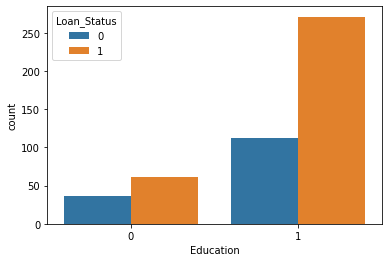

In [17]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [18]:
# separating the data and label
X = df.drop(columns=['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [19]:
print(X)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
5    LP001011       1        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1          4          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

In [20]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train Test Split

In [21]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [22]:
Loan_id=X_test['Loan_ID']
print(Loan_id)

368    LP002190
74     LP001253
135    LP001488
53     LP001179
96     LP001327
388    LP002244
345    LP002129
8      LP001018
549    LP002777
99     LP001343
49     LP001151
513    LP002648
43     LP001131
92     LP001319
555    LP002792
609    LP002978
221    LP001743
454    LP002453
607    LP002964
179    LP001630
277    LP001904
488    LP002555
150    LP001528
585    LP002912
168    LP001579
267    LP001882
543    LP002755
520    LP002689
22     LP001047
69     LP001241
91     LP001318
250    LP001835
416    LP002341
154    LP001535
415    LP002337
291    LP001938
253    LP001843
97     LP001333
393    LP002265
399    LP002287
537    LP002738
15     LP001032
469    LP002505
371    LP002197
300    LP001964
189    LP001647
224    LP001750
201    LP001677
Name: Loan_ID, dtype: object


Training Model using SVM


In [23]:
classifier=svm.SVC(kernel='linear')

In [24]:
X_train=X_train.drop(columns=['Loan_ID'],axis=1)


In [25]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
122,0,0,0,1,0,2137,8980.0,137.0,360.0,0.0,1
498,1,1,1,1,1,2895,0.0,95.0,360.0,1.0,1
144,1,1,2,1,0,11757,0.0,187.0,180.0,1.0,2
217,1,1,0,1,0,3727,1775.0,131.0,360.0,1.0,1
362,1,1,0,1,0,4750,2333.0,130.0,360.0,1.0,2


In [26]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [27]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [28]:
Y_test.head()

368    1
74     1
135    0
53     0
96     1
Name: Loan_Status, dtype: int64

In [29]:
X_test=X_test.drop(columns=['Loan_ID'],axis=1)

In [30]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [31]:
print(X.shape, X_train.shape, X_test.shape,Y_test.shape)

(480, 12) (432, 11) (48, 11) (48,)


In [32]:
print(Y_test)

368    1
74     1
135    0
53     0
96     1
388    1
345    1
8      1
549    1
99     1
49     1
513    0
43     1
92     1
555    1
609    1
221    1
454    1
607    1
179    0
277    1
488    1
150    0
585    0
168    0
267    1
543    1
520    1
22     0
69     0
91     1
250    0
416    0
154    1
415    1
291    0
253    1
97     1
393    1
399    0
537    1
15     1
469    0
371    1
300    0
189    1
224    1
201    1
Name: Loan_Status, dtype: int64


In [33]:
output = pd.DataFrame({'Loan_id':Loan_id, 'label':Y_test})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
